# **Lab1: Recommendation System (RS) for movies**

* Review of different types of RS
* Use MovieLens dataset for building RS

## **Recommendation System (RS)**

<p align="center">
  <img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png"  width="500">
</p>


### **1. Collaborative Filtering RS**
  * Wisdom-of-crowd approach
  * Users give ratings to items. Item which get similar tastes by the customers in the past, will be recommended.
  * Example: if a user likes the movie **Toy story**, the other movies which have the similar user taste, will be given as the recommended movies
  * Memory-based filtering
    * User-based
    * Item-based
  * Model-based filtering
    * Matrix Factorization, KNN
    * Surprise package

### **2. Content-based RS**
  * Simply based on the provided item information
  * Recommend items that are "similar" to the user preferences
  * Example: if a user likes the movie **Toy story**, and with the provided item information of **Toy story**, it is tagged as "animation", "Disney", "family", "toys". Then the recommended movies will be related to these tags.
  * Pros and Cons?
    * No need of user-ratings
    * Tend to propose "more of the same", so the recommendations might be boring as items are too similar. Eg. if the movie is an animation movie, the top K movies will be animations.







### **3. Hybrid RS**

<p align="center">
  <img src="https://dataconomy.com/wp-content/uploads/2015/03/Introduction-What-is-a-Recommendation-Engine-Hybrid-Recommender-Systems.jpg"  width="400">
</p>

  * Overcome the disadvantages of different RS
  * Combinations of various inputs and/or composition of different mechanism in order to overcome problems of single methods
  * Weighting or Voting scheme


## **Download the movielens data**
We download the movielens data from [**GroupLens**](https://grouplens.org/about/what-is-grouplens/). 

<img src="https://avatars0.githubusercontent.com/u/5495590?s=200&v=4"  width="100">


**GroupLens** is a research lab in the Department of Computer Science and Engineering at the University of Minnesota. They are specialized in recommender systems, online communities, mobile and ubiquitous technologies, digital libraries, and local geographic information systems. They provided a variety of datasets related to recommender systems. You can use it for your project.

According to **movielens** dataset, there are different dataset size (i.e. 20m, 10m).

In our tutorial, we use the 100K one, where you can download it from 
[**Here**](https://grouplens.org/datasets/movielens/latest/)

Please download the [**ml-small-latest.zip (size: 1 MB)**](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip).

For this tutorial we focus on the **preprocessing steps of the data** and **the implementation of different types of RS**. 

However, in consideration of your project, it's better to choose a larger dataset size with the combination of other resources (e.g. [**tmdb**](https://www.themoviedb.org/) as another movie dataset).

Have fun!

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
## Two ways to load data from sources
# First way, Upload the file locally (need to use safari or chrome to open the colab)
from google.colab import files
uploaded = files.upload()

In [0]:
# Second way, upload your file to your Google Drive folder and load it 
# (It is required to change direction to the repository)
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Teaching/Web Mining/2020/tutorials/RS"
%cd /content/drive/My\ Drive/Teaching/Web\ Mining/2020/tutorials/RS/ml-latest-small/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Lab1_ RS for movies.ipynb'  'Lab2_ RS by using MF.ipynb'   ml-latest-small
/content/drive/My Drive/Teaching/Web Mining/2020/tutorials/RS/ml-latest-small



## **Movielens-100K Dataset Information**
*   **movies.csv**
    * movieId, title, genres
    * 9742 movies 

*   **ratings.csv**
    * userId, movieId, rating, timestamp
    * 100836 rows, 9724 unique movies, 610 unique users
*   **tags.csv**
    * userId, movieId, tag, timestamp
    * 3683 rows
*   **links.csv**
    * movieId, imdbId, tmdbId
    * 9742 rows


In [0]:
## Load movies data
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv') 
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')

In [0]:
## links.csv is useful when you want to merge movielens dataset with tmdb dataset based on its id
print('Total rows: ', len(links))
print('Unique rows based on movieId: ', len(links.movieId.unique()))
print('Unique rows based on imdbId: ', len(links.imdbId.unique()))
print('Unique rows based on tmdbId: ', len(links.tmdbId.unique()))
links.head(5)

Total rows:  9742
Unique rows based on movieId:  9742
Unique rows based on imdbId:  9742
Unique rows based on tmdbId:  9734


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [0]:
## movies.csv infos
print('Total rows: ', len(movies))
#print('Unique rows based on movieId: ', len(movies.movieId.unique()))
print('Unique rows based on movieId: ', len(movies.drop_duplicates(['movieId', 'title'])))
movies.head(5)

Total rows:  9742
Unique rows based on movieId:  9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
## Remove the segmentation sign "|" in movies.genres
movies['genres'] = movies['genres'].str.replace('|',' ')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
## tags.csv infos
print('Total rows: ', len(tags))
print('Unique rows based on userId & movieId & tag: ', len(tags.drop_duplicates(['userId', 'movieId', 'tag'])))
tags.head(5)

Total rows:  3683
Unique rows based on userId & movieId & tag:  3683


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [0]:
## ratings.csv infos
print('Total rows: ', len(ratings))
print('Unique rows based on userId & movieId: ', len(ratings.drop_duplicates(['userId', 'movieId'])))
print('Unique rows based on movieId: ', len(ratings.drop_duplicates(['movieId'])))
print('Unique rows based on userId: ', len(ratings.drop_duplicates(['userId'])))
ratings.head(5)

Total rows:  100836
Unique rows based on userId & movieId:  100836
Unique rows based on movieId:  9724
Unique rows based on userId:  610


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# Not every user has the same set of movies to rate
# Check for different userId (e.g. userId=2, userId=1)
ratings[ratings.userId==1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


###### **Plot the distribution of rating**

Text(0, 0.5, 'Frequency')

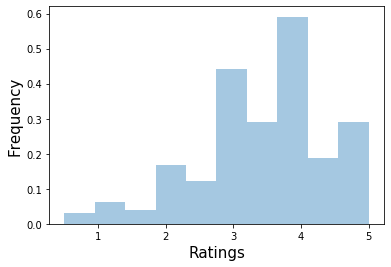

In [0]:
# Distribution of rating
sns.distplot(ratings['rating'], kde=False, norm_hist=True, bins=10)
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#plt.xlim([0,5.0])

# ratings['rating'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
# plt.xlabel("Ratings", fontsize=15)
# plt.ylabel("Frequency",fontsize=15)
# plt.xlim([0,5.0])

Text(0, 0.5, 'Frequency of users')

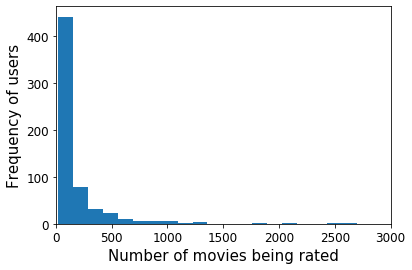

In [0]:
# Distribution of the number of users and the number of movies rated per user
ratings.groupby(['userId']).size().hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlim([0,3000])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)

Text(0, 0.5, 'Frequency of users')

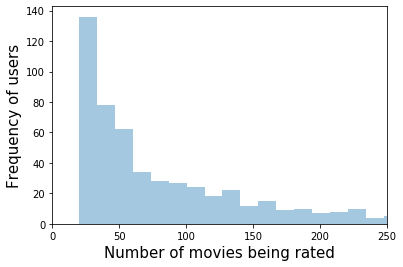

In [0]:
sns.distplot(ratings.groupby(['userId']).size(), kde=False, norm_hist=False, bins=200)
plt.xlim([0,250.0])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)

In [0]:
# Limit user ratings that have rated more than 30 movies 
# If you have more than 20m user ratings, it will be problematic to pivot the rating dataframe later for collaborative filtering
# That is you're userId/movieId pivot table will be super sparse, this is one of the ways to limit the users while not losing too many rated movies
# But there are also other ways to do with sparse matrix (e.g. SVD)

# ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 50 and len(x)<1600)
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 30)
print(len(ratings_f.groupby(['userId']).size()))
#ratings_f.groupby(['userId']).size()

501


Text(0, 0.5, 'Frequency of users')

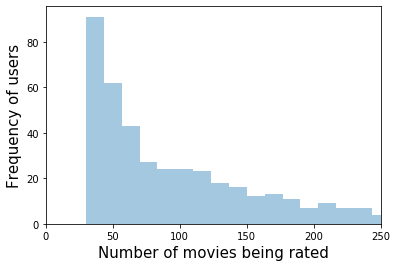

In [0]:
sns.distplot(ratings_f.groupby(['userId']).size(), kde=False, norm_hist=False, bins=200)
plt.xlim([0,250.0])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)

In [0]:
# List the movieId after the ratings count filtering
# Preserve 100.00% of the original movies in ratings dataframe
# But after filtering, preserve only  82.13% of the users
movie_list_rating = ratings_f.movieId.unique().tolist()
movies_filter = movies[movies.movieId.isin(movie_list_rating)]
print('Preserved rate of the movies : {0:.2f} %'.format(len(ratings_f.movieId.unique())/len(movies_filter.movieId.unique()) * 100))
print('Preserved rate of the users : {0:.2f} %'.format(len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100))

Preserved rate of the movies : 100.00 %
Preserved rate of the users : 82.13 %


In [0]:
# Since currently we're using a rather small dataset, this won't be a case, so we can set the user ratings to 0
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 0)
print(len(ratings_f.groupby(['userId']).size()))
movie_list_rating = ratings_f.movieId.unique().tolist()
movies_filter = movies[movies.movieId.isin(movie_list_rating)]
print('Preserved rate of the movies : {0:.2f} %'.format(len(ratings_f.movieId.unique())/len(movies_filter.movieId.unique()) * 100))
print('Preserved rate of the users : {0:.2f} %'.format(len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100))

610
Preserved rate of the movies : 100.00 %
Preserved rate of the users : 100.00 %


In [0]:
# Map movie to id:
Mapping_file = dict(zip(movies_filter.title.tolist(), movies_filter.movieId.tolist()))
# Drop timestamp since we don't need it
tags.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

## **1. Collaborative Filtering RS (User-based & Item-based)**

### **a). Merge movies and ratings dataframe**

In [0]:
# Limit the user rating count which is greater than 0
ratings_f.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [0]:
# Merge movies dataframe with ratings dataframe, so that we know for each movie which user rates the movie
ratings_f1 = pd.merge(movies_filter[['movieId']], ratings_f, on="movieId", how="right")
ratings_f1.head(5)

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


### **b).   Create a userId-movieId sparse matrix**

In [0]:
# Use the function pivot to come up with the matrix (movieId, userId) and the rating
# Be careful for this pivot table, currently since we only have 610 users
# What if the number of users are greater than 200m, it will be super sparse, and will face the memory issue since having limited RAM
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
ratings_f2.head(3)

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [0]:
def create_pivot_table(pd_df):
    data = pd_df.values
    #print(data.shape)
    rows, row_pos = np.unique(data[:, 0], return_inverse=True)
    cols, col_pos = np.unique(data[:, 1], return_inverse=True)
    pivot_matrix = np.zeros((len(rows), len(cols)), dtype=data.dtype)
    pivot_matrix[row_pos, col_pos] = data[:, 2]
    print(pivot_matrix.shape)
    return pivot_matrix

In [0]:
# ratings_f2: item-user matrix (9724, 610)
ratings_f2 = create_pivot_table(ratings_f1)
# ratings_f2.T: user-item matrix (610, 9724)

(9724, 610)


### **c).   Calculate similarity matrix for user & item**

* **User Similarity Matrix (#user, #user)**: what is the similarity score between users
* **Item Similarity Matrix (#movie, #movie)**: what is the similarity score between movies

In [0]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(ratings_f2.T, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print('Shape of User Similarity Matrix:', user_correlation.shape)
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(ratings_f2, metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print('Shape of Item Similarity Matrix:', item_correlation.shape)

Shape of User Similarity Matrix: (610, 610)
Shape of Item Similarity Matrix: (9724, 9724)


### **d).   Predict rating based on item-based or user-based methods**
* User-based:
$$\hat{r}_{ui} = \mu_u + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - \mu_v)} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)}$$
* Item-based:
$$\hat{r}_{ui} = \mu_i + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j)} {\sum\limits_{j \in
N^k_u(i)} \text{sim}(i, j)}$$

In [0]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        #pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        pred = 0 + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        mean_item_rating = ratings.mean(axis=0)
        ratings_diff = (ratings - mean_item_rating[np.newaxis, :])
        pred = 0 + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        #pred = mean_item_rating[np.newaxis, :] + ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    elif type == 'content':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred.clip(min=0)

In [0]:
#train_data_matrix  = ratings_f2.T.as_matrix(columns = ['userId', 'movieId', 'rating'])
user_prediction = predict(ratings_f2.T, user_correlation, type='user')
item_prediction = predict(ratings_f2.T, item_correlation, type='item')

### **e).   Recommend movies based on user preference**

In [0]:
user_pred_df = pd.DataFrame(user_prediction, columns = list(movies_filter.movieId))
item_pred_df = pd.DataFrame(item_prediction, columns = list(movies_filter.movieId))

In [0]:
def recommend_movies(pred_df, userID, movies, original_ratings, num_recommendations, method_name):
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = pred_df.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).rename_axis('movieId').reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: method_name}).
         sort_values(method_name, ascending = False).
                       iloc[:num_recommendations, :]
                      )

    return user_full, recommendations

In [0]:
print('Collaborative Filtering RS (user-based)')
user_full, recommendations = recommend_movies(user_pred_df, 2, movies_filter, ratings_f1, 10, 'CF_user_pred_rating')
recommendations

Collaborative Filtering RS (user-based)


,movieId,title,genres,CF_user_pred_rating
1935,2571,"Matrix, The (1999)",Action Sci-Fi Thriller,2.749779
312,356,Forrest Gump (1994),Comedy Drama Romance War,2.691291
2221,2959,Fight Club (1999),Action Crime Drama Thriller,2.625602
257,296,Pulp Fiction (1994),Comedy Crime Drama Thriller,2.393434
508,593,"Silence of the Lambs, The (1991)",Crime Horror Thriller,2.156988
4786,7153,"Lord of the Rings: The Return of the King, The...",Action Adventure Drama Fantasy,2.153346
3629,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure Fantasy,2.135735
4127,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure Fantasy,1.953437
224,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Sci-Fi,1.944342
657,858,"Godfather, The (1972)",Crime Drama,1.801606


In [0]:
# New
print('Collaborative Filtering RS (user-based)')
user_full, recommendations = recommend_movies(user_pred_df, 2, movies_filter, ratings_f1, 10, 'CF_user_pred_rating')
recommendations

Collaborative Filtering RS (user-based)


,movieId,title,genres,CF_user_pred_rating
1935,2571,"Matrix, The (1999)",Action Sci-Fi Thriller,2.738004
312,356,Forrest Gump (1994),Comedy Drama Romance War,2.679516
2221,2959,Fight Club (1999),Action Crime Drama Thriller,2.613827
257,296,Pulp Fiction (1994),Comedy Crime Drama Thriller,2.381659
508,593,"Silence of the Lambs, The (1991)",Crime Horror Thriller,2.145213
4786,7153,"Lord of the Rings: The Return of the King, The...",Action Adventure Drama Fantasy,2.141571
3629,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure Fantasy,2.123960
4127,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure Fantasy,1.941662
224,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Sci-Fi,1.932567
657,858,"Godfather, The (1972)",Crime Drama,1.789831


In [0]:
print('Collaborative Filtering RS (item-based)')
user_full, recommendations = recommend_movies(item_pred_df, 2, movies_filter, ratings_f1, 10, 'CF_item_pred_rating')
recommendations

Collaborative Filtering RS (item-based)


,movieId,title,genres,CF_item_pred_rating
312,356,Forrest Gump (1994),Comedy Drama Romance War,2.115425
257,296,Pulp Fiction (1994),Comedy Crime Drama Thriller,1.986182
1935,2571,"Matrix, The (1999)",Action Sci-Fi Thriller,1.788083
508,593,"Silence of the Lambs, The (1991)",Crime Horror Thriller,1.777457
224,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Sci-Fi,1.617022
97,110,Braveheart (1995),Action Drama War,1.427989
2221,2959,Fight Club (1999),Action Crime Drama Thriller,1.414465
459,527,Schindler's List (1993),Drama War,1.389348
895,1196,Star Wars: Episode V - The Empire Strikes Back...,Action Adventure Sci-Fi,1.334725
416,480,Jurassic Park (1993),Action Adventure Sci-Fi Thriller,1.329488


In [0]:
#New
print('Collaborative Filtering RS (item-based)')
user_full, recommendations = recommend_movies(item_pred_df, 2, movies_filter, ratings_f1, 10, 'CF_item_pred_rating')
recommendations

Collaborative Filtering RS (item-based)


,movieId,title,genres,CF_item_pred_rating
9011,142056,Iron Man & Hulk: Heroes United (2013),Action Adventure Animation,0.330175
9397,167296,Iron Man (1931),Drama,0.330175
8618,121129,The Hungover Games (2014),Comedy,0.173644
8971,140523,"Visit, The (2015)",Comedy Horror,0.009347
9610,180987,Ferdinand (2017),Animation Children Comedy,0.001637
9126,148978,Blue Exorcist: The Movie (2012),Animation Fantasy Horror Mystery,0.001637
9496,172705,Tickling Giants (2017),Documentary,0.001637
9577,178111,"Fireworks, Should We See It from the Side or t...",Animation,0.001637
9543,175475,The Emoji Movie (2017),Animation Children Comedy,0.001637
9238,158035,Gintama: The Final Chapter - Be Forever Yorozu...,Action Animation Comedy,0.001637


In [0]:
# Let's check what is the user preference!
user_full

,movieId,userId,rating,title,genres
28,131724,2,5.0,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
27,122882,2,5.0,Mad Max: Fury Road (2015),Action Adventure Sci-Fi Thriller
22,106782,2,5.0,"Wolf of Wall Street, The (2013)",Comedy Crime Drama
18,89774,2,5.0,Warrior (2011),Drama
9,60756,2,5.0,Step Brothers (2008),Comedy
16,80906,2,5.0,Inside Job (2010),Documentary
2,1704,2,4.5,Good Will Hunting (1997),Drama Romance
8,58559,2,4.5,"Dark Knight, The (2008)",Action Crime Drama IMAX
10,68157,2,4.5,Inglourious Basterds (2009),Action Drama War
15,80489,2,4.5,"Town, The (2010)",Crime Drama Thriller


## **2. Content-based RS**

### **a). Merge movies and tags dataframe and create a metadata (i.e. content) for each movie**

In [0]:
# Create a merge dataframe of movies title, genres and all user tags given to each movie
# this indicates the content information of the movies
# Here you can either merge based on the usertag, or if you use the movielens-20m dataset, 
# you can merge the reference score of genome_scores.csv for each tag based on each movie
movie_list_rating = ratings_f.movieId.unique().tolist()
movies_filter = movies[movies.movieId.isin(movie_list_rating)]
merge = pd.merge(movies_filter, tags, on='movieId', how='left')
#merge['userId'].astype(int).astype(str)
merge.head(5)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game


In [0]:
# There are a lot of NA in our dataframe, so we fill it with an empty string
merge[merge.isna().any(axis=1)]

,movieId,title,genres,userId,tag
9,4,Waiting to Exhale (1995),Comedy Drama Romance,NaN,NaN
12,6,Heat (1995),Action Crime Thriller,NaN,NaN
14,8,Tom and Huck (1995),Adventure Children,NaN,NaN
15,9,Sudden Death (1995),Action,NaN,NaN
16,10,GoldenEye (1995),Action Adventure Thriller,NaN,NaN
...,...,...,...,...,...
11827,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,NaN,NaN
11828,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,NaN,NaN
11829,193585,Flint (2017),Drama,NaN,NaN
11830,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,NaN,NaN


In [0]:
merge.fillna("", inplace=True)

In [0]:
# Now check again if there still exists NA values
merge[merge.isna().any(axis=1)]

,movieId,title,genres,userId,tag


### **b).   Create a metadata (i.e. content) for each movie**

In [0]:
# Now what we want is per movie, a content description based on the genres and the tag for each movie
merge = pd.DataFrame(merge.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies_filter, merge, on='movieId', how='left')
Final.head(5)

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake


In [0]:
Final['metadata'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)
print(len(Final))
Final = Final[['movieId','title','metadata']]
Final.head(3)

9724


,movieId,title,metadata
0,1,Toy Story (1995),pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy Romance


### **c).   Tf-Idf sparse matrix + cosine similarity**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
# 9724 movies, using 1675 terms to describe
print(tfidf_df.shape)

(9724, 1675)


In [0]:
tfidf_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149213,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix based on the tfidf_matrix
content_correlation = linear_kernel(tfidf_matrix, tfidf_matrix)

### **d).   Predict rating based on content-based methods**
* Content-based:
$$\hat{r}_{ui} = \frac{
\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j) \cdot r_{uj}}
{\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j)} \tag{3a}$$

or

$$\hat{r}_{ui} = \mu_i + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j)} {\sum\limits_{j \in
N^k_u(i)} \text{sim}(i, j)} \tag{3b}$$

* If no user ranking, simply consider the similarity score and normalize to scale of the rating $[a,b]$:

$$ x^{'} = (b-a)\frac{x - \min{x}}{\max{x} - \min{x}} + a \tag{3c}$$

In [0]:
# (3a)
content_prediction = predict(ratings_f2.T, content_correlation, type='content')
content_pred_df = pd.DataFrame(content_prediction, columns = list(movies_filter.movieId))
print('Content-based RS with ranking')
user_full, recommendations = recommend_movies(content_pred_df, 5, Final, ratings_f1, 10, 'CT_3a_pred_rating')
recommendations

Content-based RS with ranking


,movieId,title,metadata,CT_3a_pred_rating
483,616,"Aristocats, The (1970)",Disney Animation Children,0.057678
675,938,Gigi (1958),prostitution Musical,0.057050
297,363,"Wonderful, Horrible Life of Leni Riefenstahl, ...",Holocaust In Netflix queue Documentary,0.046501
739,1025,"Sword in the Stone, The (1963)",Disney King Arthur Animation Children Fantasy ...,0.044982
936,1282,Fantasia (1940),Disney Animation Children Fantasy Musical,0.044466
5932,37240,Why We Fight (2005),In Netflix queue Documentary,0.038406
4740,7141,My Flesh and Blood (2003),In Netflix queue Documentary,0.038406
2220,3007,American Movie (1999),In Netflix queue Documentary,0.038406
3701,5224,Promises (2001),In Netflix queue Documentary,0.038406
5340,8998,That's Entertainment (1974),In Netflix queue Documentary,0.038406


In [0]:
# (3b)
content_prediction = predict(ratings_f2.T, content_correlation, type='item')
content_pred_df = pd.DataFrame(content_prediction, columns = list(movies_filter.movieId))
print('Content-based RS with ranking')
user_full, recommendations = recommend_movies(content_pred_df, 5, Final, ratings_f1, 10, 'CT_3b_pred_rating')
recommendations

Content-based RS with ranking


,movieId,title,metadata,CT_3b_pred_rating
291,356,Forrest Gump (1994),shrimp Vietnam bubba gump shrimp lieutenant da...,2.201871
471,593,"Silence of the Lambs, The (1991)",Hannibal Lector disturbing drama gothic psycho...,1.865258
1894,2571,"Matrix, The (1999)",martial arts sci-fi alternate universe philoso...,1.840122
211,260,Star Wars: Episode IV - A New Hope (1977),classic space action action sci-fi EPIC great ...,1.665563
2180,2959,Fight Club (1999),dark comedy psychology thought-provoking twist...,1.474463
387,480,Jurassic Park (1993),Dinosaur Action Adventure Sci-Fi Thriller,1.399350
853,1196,Star Wars: Episode V - The Empire Strikes Back...,I am your father space space opera classic Geo...,1.380129
2100,2858,American Beauty (1999),Drama Romance,1.325425
615,858,"Godfather, The (1972)",Mafia Crime Drama,1.313277
855,1198,Raiders of the Lost Ark (Indiana Jones and the...,adventure archaeology indiana jones Steven Spi...,1.301879


In [0]:
# (3c)
def pred_norm(similarity, a, b):
  return (b-a)*((similarity-np.min(similarity, axis=1)[np.newaxis, :])/np.max(similarity, axis=1)[np.newaxis, :]-np.min(similarity, axis=1)[np.newaxis, :])+a
content_prediction = pred_norm(content_correlation, 0,5)
content_pred_df = pd.DataFrame(content_prediction, columns = list(movies_filter.movieId))
print(content_pred_df.shape)
print('Content-based RS without ranking')
content_pred_df

(9724, 9724)
Content-based RS without ranking


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,5.000000,0.440317,0.067414,0.241508,0.081599,0.000000,0.110842,1.170325,0.000000,0.469591,0.079966,0.243828,1.491543,0.000000,0.460528,0.000000,0.000000,0.478689,0.478689,0.168524,0.094460,0.000000,0.000000,0.000000,0.000000,0.000000,0.809345,0.000000,0.471906,0.000000,0.000000,0.000000,0.137072,0.000000,0.460176,0.034113,0.000000,0.000000,0.000000,0.000000,...,0.0,0.282401,0.478689,0.474729,0.367571,0.326385,1.365606,0.045342,0.286212,0.0,0.646678,0.848276,0.000000,0.273080,0.478689,1.238582,0.351380,0.0,0.469591,0.000000,0.000000,0.229093,0.0,0.000000,0.478689,0.000000,0.000000,0.924683,0.0,0.494759,0.310822,0.833972,0.351380,0.924683,0.0,1.218496,1.353703,0.000000,0.754494,0.478689
1,0.440317,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.898912,0.000000,0.360687,0.000000,0.000000,0.705323,0.000000,0.353726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.621649,0.000000,0.570324,0.000000,0.000000,0.000000,0.105284,0.000000,0.275742,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.729267,0.282327,0.250693,0.645770,0.000000,0.219836,0.0,0.760532,0.872058,0.000000,0.000000,0.000000,1.273306,0.000000,0.0,0.360687,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.269197,0.000000,0.000000,0.000000,0.000000,0.0,0.764384,0.849202,0.000000,0.000000,0.000000
2,0.067414,0.000000,5.000000,1.091615,0.120032,0.000000,0.501006,0.000000,0.000000,0.000000,0.361447,0.358669,0.000000,0.000000,0.578051,0.000000,0.226358,0.704148,0.704148,0.247898,0.138950,0.000000,0.000000,0.000000,0.315220,0.000000,0.000000,0.193604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148831,0.154192,0.000000,0.000000,0.000000,0.000000,...,0.0,0.415410,0.704148,0.000000,0.000000,0.000000,0.000000,0.066698,0.000000,0.0,0.222998,0.186382,0.000000,1.234319,0.704148,0.272140,0.516877,0.0,0.000000,0.000000,0.000000,0.336995,0.0,0.852858,0.704148,0.000000,0.000000,0.000000,0.0,0.212238,0.159546,0.000000,0.516877,0.000000,0.0,0.224127,0.248997,0.000000,0.000000,0.704148
3,0.241508,0.000000,1.091615,5.000000,0.430013,0.000000,1.794849,0.000000,0.000000,0.000000,1.655562,1.284930,0.000000,0.377217,2.070862,0.500334,1.145780,2.522603,2.522603,1.648207,0.497786,0.323303,0.000000,0.842926,1.595579,0.552139,1.028822,0.979983,0.373754,1.176828,0.297387,0.000000,0.174243,0.276884,0.533186,0.552392,0.295814,0.483208,0.943268,0.526950,...,0.0,1.488201,2.522603,0.000000,0.000000,0.606038,0.000000,0.238945,0.000000,0.0,0.798887,0.667713,1.176828,4.421933,2.522603,0.974939,3.436573,0.0,0.000000,0.000000,0.000000,2.240583,0.0,4.316998,2.522603,2.333775,2.333775,0.000000,0.0,0.760341,0.571573,1.008063,3.436573,0.000000,0.0,0.802933,0.892028,2.333775,0.000000,2.522603
4,0.081599,0.000000,0.120032,0.430013,5.000000,0.000000,3.271798,0.000000,0.000000,0.000000,0.142383,0.434144,0.000000,0.000000,0.000000,0.000000,0.000000,0.852321,0.852321,0.300063,0.168189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.573578,0.000000,0.000000,0.180149,0.060740,0.000000,0.000000,0.000000,0.000000,...,0.0,0.502824,0.852321,0.000000,0.000000,0.000000,0.000000,0.080733,0.000000,0.0,0.269923,0.225603,0.000000,0.486228,0.852321,0.329406,0.625643,0.0,0.000000,0.000000,0.000000,0.407908,0.0,0.000000,0.852321,0.000000,0.000000,0.000000,0.0,0.256899,0.193120,0.000000,0.625643,0.000000,0.0,0.271290,0.301393,0.000000,0.000000,0.852321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
indices = pd.Series(Final.index, index=Final['title']).drop_duplicates()
def get_recommendations(title, cosine_sim, method_name, num_recommend=10):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top K most similar movies
    sim_scores = sim_scores[1:num_recommend]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Get the pred scores
    movie_pred_score = [i[1] for i in sim_scores]

    # Return the top K most similar movies
    return pd.DataFrame({'movieId': movie_indices,'title': list(Final['title'].iloc[movie_indices].values), 'metadata': list(Final['metadata'].iloc[movie_indices].values), method_name: movie_pred_score})

In [0]:
movie_search = 'Toy Story (1995)'
get_recommendations(movie_search, content_prediction, 'CT_3c_pred_rating', num_recommend=10)

,movieId,title,metadata,CT_3c_pred_rating
0,1756,"Bug's Life, A (1998)",Pixar Adventure Animation Children Comedy,4.311131
1,2353,Toy Story 2 (1999),animation Disney funny original Pixar sequel T...,3.220216
2,8677,Guardians of the Galaxy 2 (2017),fun Action Adventure Sci-Fi,1.838403
3,1705,Antz (1998),Adventure Animation Children Comedy Fantasy,1.789461
4,2805,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,1.789461
5,2996,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,1.789461
6,3563,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,1.789461
7,6177,"Wild, The (2006)",Adventure Animation Children Comedy Fantasy,1.789461
8,6469,Shrek the Third (2007),Adventure Animation Children Comedy Fantasy,1.789461


In [0]:
movie_search = 'Grumpier Old Men (1995)'
get_recommendations(movie_search, content_prediction, 'CT_3c_pred_rating', num_recommend=10)

,movieId,title,metadata,CT_3c_pred_rating
0,57,Two if by Sea (1996),Comedy Romance,1.234319
1,60,French Twist (Gazon maudit) (1995),Comedy Romance,1.234319
2,103,If Lucy Fell (1996),Comedy Romance,1.234319
3,111,Pie in the Sky (1996),Comedy Romance,1.234319
4,152,Mallrats (1995),Comedy Romance,1.234319
5,157,Nine Months (1995),Comedy Romance,1.234319
6,238,Milk Money (1994),Comedy Romance,1.234319
7,248,Nina Takes a Lover (1994),Comedy Romance,1.234319
8,250,Only You (1994),Comedy Romance,1.234319


##### **Different ways here**
* Tf-Idf vectors + (SVD) + cosine similarity [Read more](https://blog.codecentric.de/en/2019/07/recommender-system-movie-lens-dataset/)
* word2vec + cosine similarity
* More preprocessing steps: e.g. remove puntuations, stop words, lowercase, phrase-segment... etc
* More methodology can be implemented into your project
* Problem here, the movie titles have to be exactly the same with the year and in the movies dataframe, otherwise I can't find the result, any idea to solve it? (Try out in your project for more flexible search)

##### **Try out different ways**
* How about increase/decrease the number of principal components? Does the result change?
* How about doing lowercase or other preprocessing steps of the content? Does the result change?

## **3. Hybrid**

In [0]:
userid = 2
_, CF_user_pred_rating = recommend_movies(user_pred_df, userid, movies_filter, ratings_f1, len(movies_filter), 'CF_user_pred_rating')
_, CF_item_pred_rating = recommend_movies(item_pred_df, userid, movies_filter, ratings_f1, len(movies_filter), 'CF_item_pred_rating')
content_prediction = predict(ratings_f2.T, content_correlation, type='item')
content_pred_df = pd.DataFrame(content_prediction, columns = list(movies_filter.movieId))
_, CT_3b_pred_rating = recommend_movies(content_pred_df, userid, movies_filter, ratings_f1, len(movies_filter), 'CT_3b_pred_rating')
Final_hybrid = pd.merge(pd.merge(CF_user_pred_rating,CF_item_pred_rating,on=['movieId', 'title', 'genres']),CT_3b_pred_rating,on=['movieId', 'title', 'genres'])
hybrid_score = ((Final_hybrid.CF_user_pred_rating + Final_hybrid.CF_item_pred_rating + Final_hybrid.CT_3b_pred_rating)/3.0)
Final_hybrid['hybrid_pred_rating'] = hybrid_score

# Sort it on the basis of either: CF_user_pred_rating, CF_item_pred_rating, CT_3b_pred_rating or hybrid_pred_rating, 
# Here : hybrid_pred_rating
Final_hybrid.sort_values('hybrid_pred_rating', ascending=False, inplace = True)

# Recommend top K movies based on the input user
Final_hybrid.set_index(['title']).iloc[1:11]

,movieId,genres,CF_user_pred_rating,CF_item_pred_rating,CT_3b_pred_rating,hybrid_pred_rating
title,,,,,,
Pulp Fiction (1994),296,Comedy Crime Drama Thriller,2.393434,1.986182,2.060542,2.146719
"Matrix, The (1999)",2571,Action Sci-Fi Thriller,2.749779,1.788083,1.849479,2.129114
"Silence of the Lambs, The (1991)",593,Crime Horror Thriller,2.156988,1.777457,1.863575,1.932673
Fight Club (1999),2959,Action Crime Drama Thriller,2.625602,1.414465,1.479271,1.839780
Star Wars: Episode IV - A New Hope (1977),260,Action Adventure Sci-Fi,1.944342,1.617022,1.667349,1.742904
"Lord of the Rings: The Fellowship of the Ring, The (2001)",4993,Adventure Fantasy,2.135735,1.219748,1.253171,1.536218
Schindler's List (1993),527,Drama War,1.742560,1.389348,1.475520,1.535809
"Lord of the Rings: The Return of the King, The (2003)",7153,Action Adventure Drama Fantasy,2.153346,1.136825,1.187513,1.492561
Braveheart (1995),110,Action Drama War,1.521177,1.427989,1.525141,1.491436


## **Discussion**

**1. What are the possible drawbacks you can think of within this simple recommendation system?**

**2. How to improve the performance?**

## **Resources**
1. https://grouplens.org/
2. https://www.datacamp.com/community/tutorials/recommender-systems-python/
3. https://blog.codecentric.de/en/2019/07/recommender-system-movie-lens-dataset/
4. https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223